In [3]:
%matplotlib inline
import sys 
sys.path.append('../../../')
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import gpflow, gpitch
reload(gpitch)
from gpitch.amtgp import logistic
from scipy.fftpack import fft, ifft, ifftshift
from scipy import signal

np.random.seed(29)
plt.rcParams['figure.figsize'] = (16, 5)  # set plot size

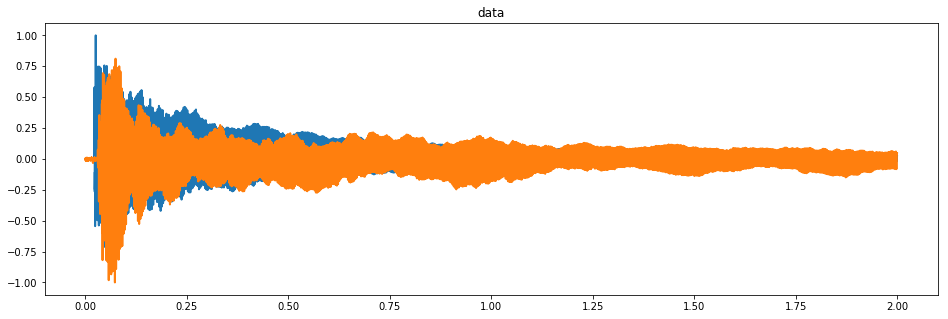

In [61]:
N = 88200 # numer of data points to load

file1 = '../../../../../../../datasets/MAPS/AkPnBcht/ISOL/NO/MAPS_ISOL_NO_F_S1_M64_AkPnBcht.wav'
file2 = '../../../../../../../datasets/MAPS/ENSTDkCl/ISOL/NO/MAPS_ISOL_NO_F_S1_M64_ENSTDkCl.wav'

fs1, y1 = gpitch.amtgp.wavread(file1, start=30000, N=N) # load two seconds of data
fs2, y2 = gpitch.amtgp.wavread(file2, start=30000, N=N) # load two seconds of data
x = np.linspace(0, (N-1.)/fs, N).reshape(-1, 1)

plt.figure()
plt.title('data')
plt.plot(x, y1, 'C0', lw=2 )
plt.plot(x, y2, 'C1', lw=2 )


(0, 0.4)

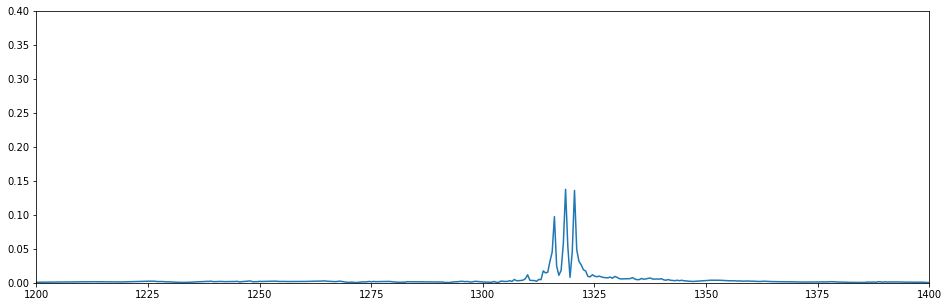

In [68]:
F = np.linspace(0, fs1//2., N//2)

Y1 = fft(y1.reshape(-1,)) #  FFT data
S1 =  2./N * np.abs(Y1[0:N//2]) #  spectral density data

Y2 = fft(y2.reshape(-1,)) #  FFT data
S2 =  2./N * np.abs(Y2[0:N//2]) #  spectral density data
    
plt.figure()
#plt.plot(F, S1/np.max(S1))
plt.plot(F, S2/np.max(S2))
plt.xlim([1200, 1400])
plt.ylim([0, 0.4])